In [59]:
import os

import pandas as pd
from matplotlib import pyplot as plt

In [60]:
def read_logs(log_dir, filenames):
    """Read in log files as pandas dataframes.

    :param log_dir: dir containing the files.
    :param filenames: list of filenames to read.
    :return: list of dataframes for each log file
    """
    dfs = []
    for filename in filenames:
        filepath = os.path.join(log_dir, filename)
        x = pd.read_csv(filepath)
        dfs.append(x)
    return dfs

In [61]:
def plot_layer_to_metric(title, model_dfs, metrics_to_plot, figsize=(10, 12)):
    """For each metric in `metrics_to_plot`, create a line plot mapping from probed layer to metric, for each model in `model_dfs`.

    :param title: title of the plot.
    :param model_dfs: a list of dataframes with one dataframe for each probed subject model. Must contain 'model/subject_model/model_name' and 'model/pooler/layer_to_probe' columns.
    :param metrics_to_plot: a list of metrics to select from a model's df and plot.
    :param figsize: total size of the figure.
    """

    fig, axs = plt.subplots(len(metrics_to_plot), figsize=figsize, sharex=True)
    fig.suptitle(title)
    for i, metric in enumerate(metrics_to_plot):
        for df in model_dfs:
            df = df.sort_values('model/pooler/layer_to_probe')
            axs[i].plot(df['model/pooler/layer_to_probe'],
                        df[metric],
                        '.-',
                        label=df.iloc[0]['model/subject_model/model_name'])
            axs[i].legend()
            axs[i].set_ylabel(metric)

    axs[-1].set_xlabel('layer')


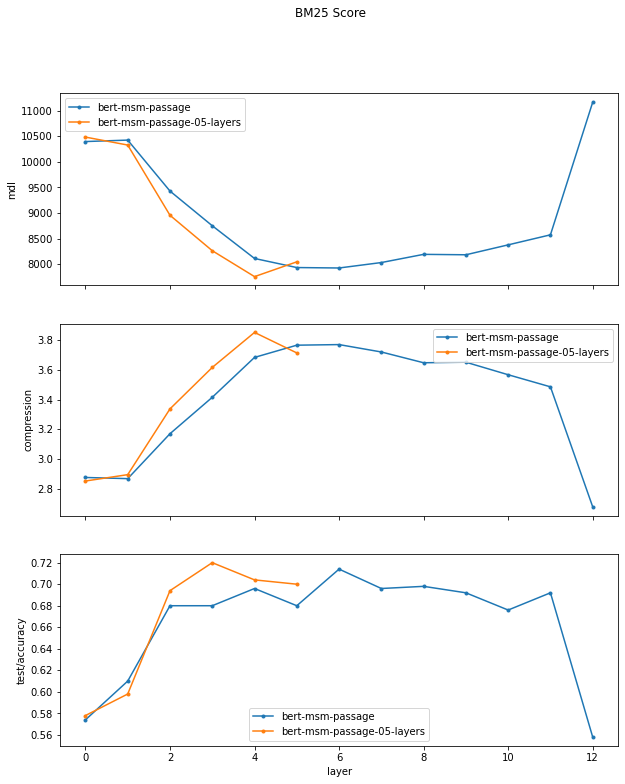

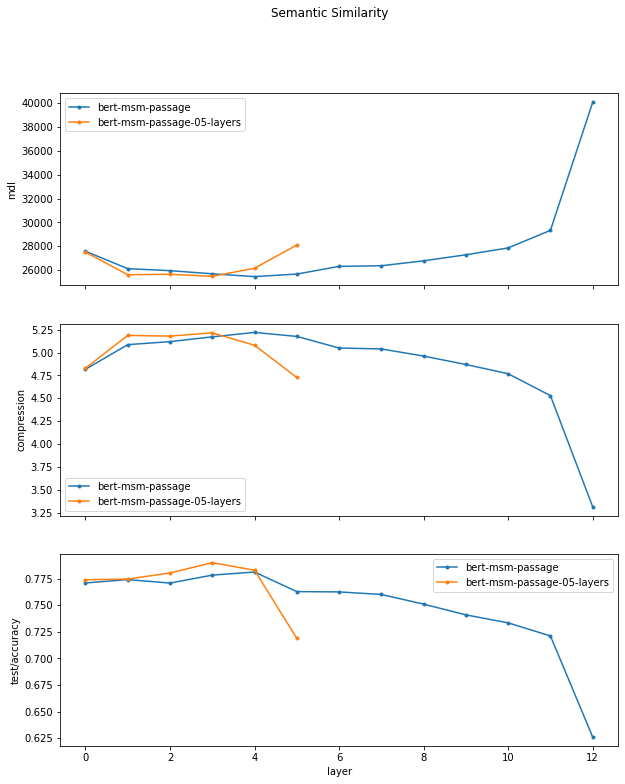

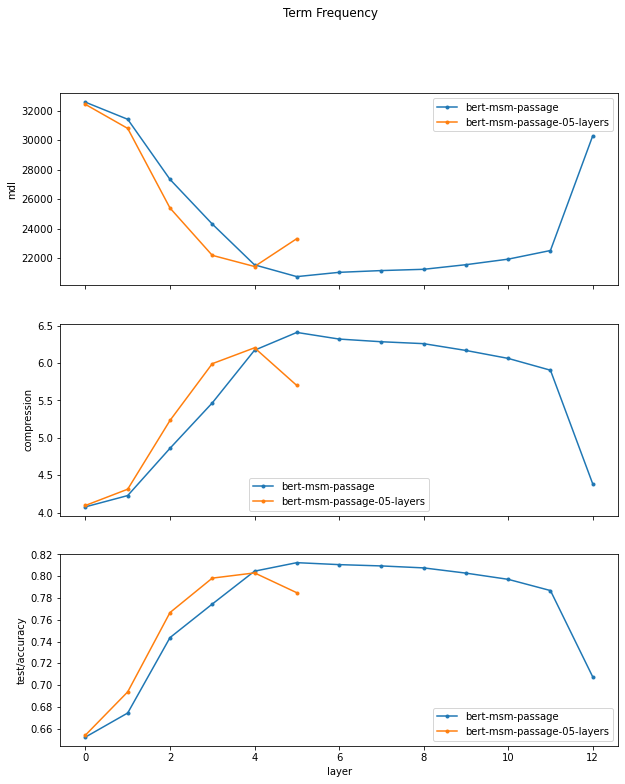

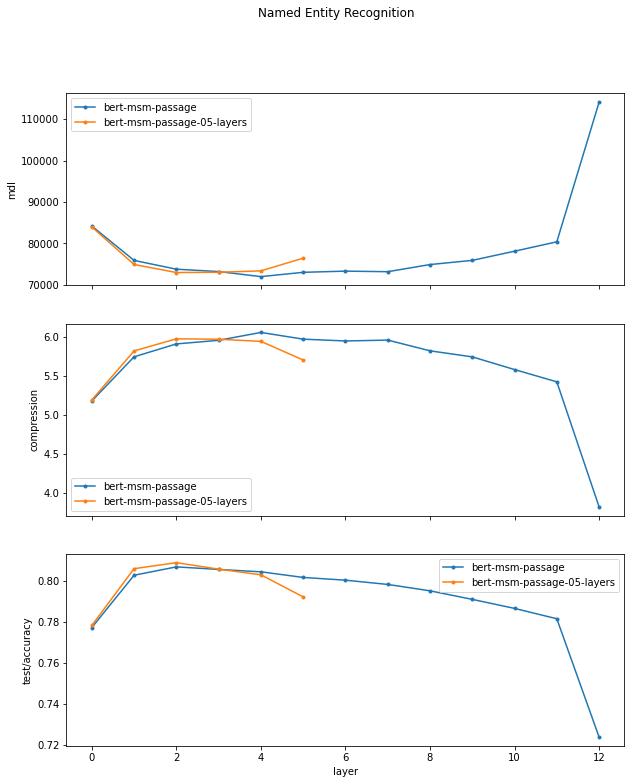

In [62]:
LOG_DIR = 'logs/layer_to_metric/'

FILE_NAMES = ['bert_msm_passage.csv', 'bert_msm_passage_05_layers.csv']
METRICS_TO_PLOT = ['mdl', 'compression', 'test/accuracy']  #'val/accuracy/max', 'val/loss/min']

task_to_name = {'bm25': 'BM25 Score',
                'sem_sim': 'Semantic Similarity',
                'term_freq': 'Term Frequency',
                'ner': 'Named Entity Recognition',
                }

for task in task_to_name:
    layer_to_metric_dfs = read_logs(os.path.join(LOG_DIR, task), FILE_NAMES)
    plot_layer_to_metric(task_to_name[task],
                         layer_to_metric_dfs,
                         METRICS_TO_PLOT,
                         figsize=(10, 12))

    os.makedirs('img', exist_ok=True)
    plt.savefig('img/' + task + '.png')
    plt.show()